In [1]:
import pandas as pd

In [35]:
us2020_url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2020.csv"
us2020_cases = pd.read_csv(us2020_url)
us2021_url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2021.csv"
us2021_cases = pd.read_csv(us2021_url)

In [36]:
us2022_url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2022.csv"
us2022_cases = pd.read_csv(us2022_url)

In [41]:

recent_url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-recent.csv"
recent_cases = pd.read_csv(recent_url)

In [37]:
us2020_cases.tail()

,date,county,state,fips,cases,deaths
884732,2020-12-31,Sweetwater,Wyoming,56037.0,2966,16.0
884733,2020-12-31,Teton,Wyoming,56039.0,2138,4.0
884734,2020-12-31,Uinta,Wyoming,56041.0,1558,7.0
884735,2020-12-31,Washakie,Wyoming,56043.0,780,19.0
884736,2020-12-31,Weston,Wyoming,56045.0,476,2.0


In [38]:
us2021_cases.tail()

,date,county,state,fips,cases,deaths
1185368,2021-12-31,Sweetwater,Wyoming,56037.0,8320,107.0
1185369,2021-12-31,Teton,Wyoming,56039.0,5950,14.0
1185370,2021-12-31,Uinta,Wyoming,56041.0,4154,31.0
1185371,2021-12-31,Washakie,Wyoming,56043.0,1879,37.0
1185372,2021-12-31,Weston,Wyoming,56045.0,1254,14.0


In [39]:
us2022_cases.tail()

,date,county,state,fips,cases,deaths
1181532,2022-12-29,Sweetwater,Wyoming,56037.0,12410,136.0
1181533,2022-12-29,Teton,Wyoming,56039.0,12010,16.0
1181534,2022-12-29,Uinta,Wyoming,56041.0,6305,43.0
1181535,2022-12-29,Washakie,Wyoming,56043.0,2721,47.0
1181536,2022-12-29,Weston,Wyoming,56045.0,1880,22.0


In [42]:
recent_cases.tail()

,date,county,state,fips,cases,deaths
97585,2022-12-29,Sweetwater,Wyoming,56037.0,12410,136.0
97586,2022-12-29,Teton,Wyoming,56039.0,12010,16.0
97587,2022-12-29,Uinta,Wyoming,56041.0,6305,43.0
97588,2022-12-29,Washakie,Wyoming,56043.0,2721,47.0
97589,2022-12-29,Weston,Wyoming,56045.0,1880,22.0


In [2]:
# Load the confirmed cases data set
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/9c3583084c24675d144bb121930c6dee3f80f370/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
confirmed_cases = pd.read_csv(confirmed_cases_url)

# Load the deaths data set
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
deaths = pd.read_csv(deaths_url)

# Load the recoveries data set
recoveries_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recoveries = pd.read_csv(recoveries_url)



In [3]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/14/22,12/15/22,12/16/22,12/17/22,12/18/22,12/19/22,12/20/22,12/21/22,12/22/22,12/23/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,206788,206879,206912,206943,207037,207084,207146,207190,207239,207262
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333591,333613,333635,333635,333650,333653,333686,333708,333708,333731
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271156,271156,271156,271168,271174,271179,271182,271186,271190,271193
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47606,47606,47606,47606,47606,47606,47686,47686,47686,47686
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104946,104946,104946,104946,104946,104946,104946,104973,104973,104973


In [4]:
# Unpivot the data
date_columns = confirmed_cases.columns[4:]
id_vars_columns = confirmed_cases.columns[:4]
confirmed_unpivoted = confirmed_cases.melt(id_vars=id_vars_columns, value_vars=date_columns, var_name='date', value_name='confirmed')
confirmed_unpivoted.tail()

,Province/State,Country/Region,Lat,Long,date,confirmed
308358,NaN,West Bank and Gaza,31.952200,35.233200,12/23/22,703228
308359,NaN,Winter Olympics 2022,39.904200,116.407400,12/23/22,535
308360,NaN,Yemen,15.552727,48.516388,12/23/22,11945
308361,NaN,Zambia,-13.133897,27.849332,12/23/22,334021
308362,NaN,Zimbabwe,-19.015438,29.154857,12/23/22,259981


In [5]:
# Unpivot the data
date_columns = deaths.columns[4:]
id_vars_columns = deaths.columns[:4]
death_unpivoted = deaths.melt(id_vars=id_vars_columns, value_vars=date_columns, var_name='date', value_name='death')
death_unpivoted.tail()

,Province/State,Country/Region,Lat,Long,date,death
310092,NaN,West Bank and Gaza,31.952200,35.233200,12/29/22,5708
310093,NaN,Winter Olympics 2022,39.904200,116.407400,12/29/22,0
310094,NaN,Yemen,15.552727,48.516388,12/29/22,2159
310095,NaN,Zambia,-13.133897,27.849332,12/29/22,4023
310096,NaN,Zimbabwe,-19.015438,29.154857,12/29/22,5637


In [6]:
# Unpivot the data
date_columns = recoveries.columns[4:]
id_vars_columns = recoveries.columns[:4]
recovered_unpivoted = recoveries.melt(id_vars=id_vars_columns, value_vars=date_columns, var_name='date', value_name='recovered')
recovered_unpivoted.tail()

,Province/State,Country/Region,Lat,Long,date,recovered
293997,NaN,West Bank and Gaza,31.952200,35.233200,12/29/22,0
293998,NaN,Winter Olympics 2022,39.904200,116.407400,12/29/22,0
293999,NaN,Yemen,15.552727,48.516388,12/29/22,0
294000,NaN,Zambia,-13.133897,27.849332,12/29/22,0
294001,NaN,Zimbabwe,-19.015438,29.154857,12/29/22,0


In [7]:
# Merge the data sets into a single dataframe
df = confirmed_unpivoted.merge(right = death_unpivoted, how = "left", on=["Province/State", "Country/Region", "Lat","Long","date"])
df = df.merge(right = recovered_unpivoted, how = "left", on=["Province/State", "Country/Region", "Lat","Long","date"])
df.head()


,Province/State,Country/Region,Lat,Long,date,confirmed,death,recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0,0.0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0,0.0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0,0.0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0,0.0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0,0.0


In [8]:
len(df), len(confirmed_unpivoted), len(death_unpivoted), len(recovered_unpivoted)

(308363, 308363, 310097, 294002)

In [10]:
#Change date format
df['date'] = pd.to_datetime(df['date'])

In [11]:
df.isna().sum()

Province/State    211266
Country/Region         0
Lat                 2134
Long                2134
date                   0
confirmed              0
death                  0
recovered          22407
dtype: int64

In [12]:
#null replacments
df["recovered"] = df["recovered"].fillna(0)

In [13]:
df.isna().sum()

Province/State    211266
Country/Region         0
Lat                 2134
Long                2134
date                   0
confirmed              0
death                  0
recovered              0
dtype: int64

In [14]:
#generate active columns
df["active"] = df["confirmed"] - df["death"] - df["recovered"]

In [15]:
df.head()

,Province/State,Country/Region,Lat,Long,date,confirmed,death,recovered,active
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0.0,0.0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0.0,0.0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0.0,0.0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0.0,0.0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0.0,0.0


In [27]:
global_sum_by_date_df = df.groupby(["date"])[["confirmed","death","recovered","active"]].sum().reset_index()

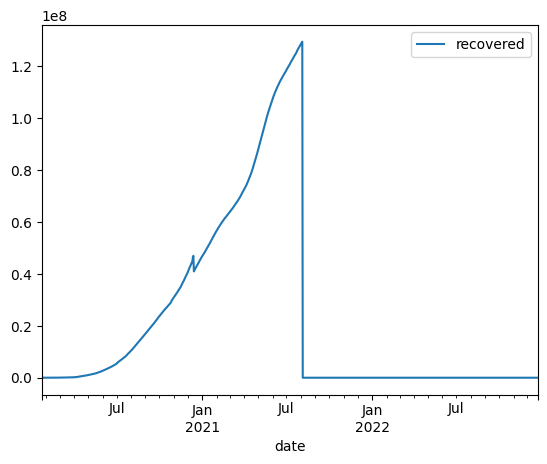

In [28]:
import matplotlib.pyplot as plt

# Select the 'Year' and 'Sales' columns
dff = global_sum_by_date_df[['date', 'recovered']]

# Plot the 'Year' and 'Sales' columns
dff.plot(x='date', y='recovered')

# Show the plot
plt.show()

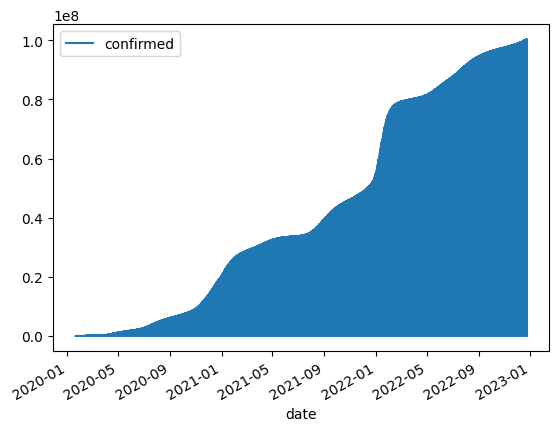

In [32]:
# Select the 'Year' and 'Sales' columns
dff1 = df[['date', 'confirmed']]

# Plot the 'Year' and 'Sales' columns
dff1.plot(x='date', y='confirmed')

# Show the plot
plt.show()

In [ ]:
global_sum_by_date_df

,date,confirmed,death,recovered,active
0,1/1/21,84362702,1911334,46840905.0,35610463.0
1,1/1/22,289995908,5473419,0.0,284522489.0
2,1/10/21,90616860,2022079,49433367.0,39161414.0
3,1/10/22,311398479,5530076,0.0,305868403.0
4,1/11/21,91231505,2032363,49713395.0,39485747.0
...,...,...,...,...,...
1062,9/8/21,223117428,4624754,0.0,218492674.0
1063,9/8/22,607809589,6512344,0.0,601297245.0
1064,9/9/20,27922899,966694,18662911.0,8293294.0
1065,9/9/21,223757526,4635504,0.0,219122022.0


In [ ]:
country_sum_by_date_df = df.groupby(["date","Country/Region"])[["confirmed","death","recovered","active"]].sum().reset_index()

In [ ]:
country_sum_by_date_df.tail()

,date,Country/Region,confirmed,death,recovered,active
214462,9/9/22,West Bank and Gaza,702591,5706,0.0,696885.0
214463,9/9/22,Winter Olympics 2022,535,0,0.0,535.0
214464,9/9/22,Yemen,11932,2155,0.0,9777.0
214465,9/9/22,Zambia,333204,4017,0.0,329187.0
214466,9/9/22,Zimbabwe,256859,5596,0.0,251263.0


# Data to show

In [21]:
#Last update date
last_update= df["date"].iloc[-1].strftime('%Y-%m-%d')
last_update

'2022-12-23'